INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 2, 'problem': 'BentCigar', 'problem_size': 150, 'communication_type': 'temp2', 'communication_operator': 'swap', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 150005it [00:36, 4158.95it/s]                            
INFO:root:Socjo finished in 4.429280046621958
Progress: 150005it [00:16, 9262.76it/s]                            
INFO:root:comparison finished in 3.9491968631744383
INFO:root:best socjo 76032.96486189739 best single 89770.61115563937


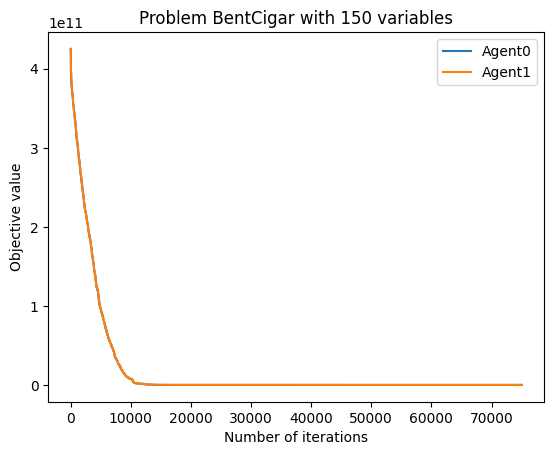

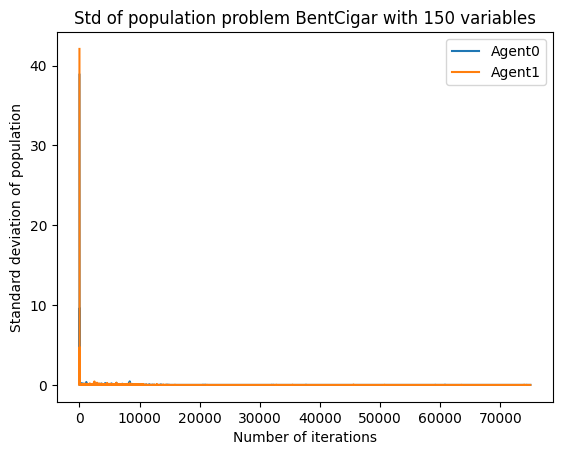

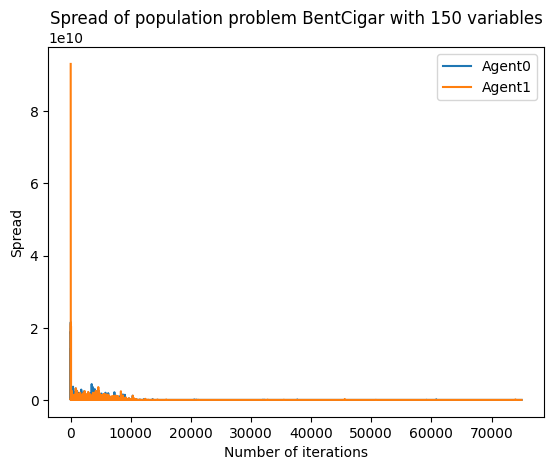

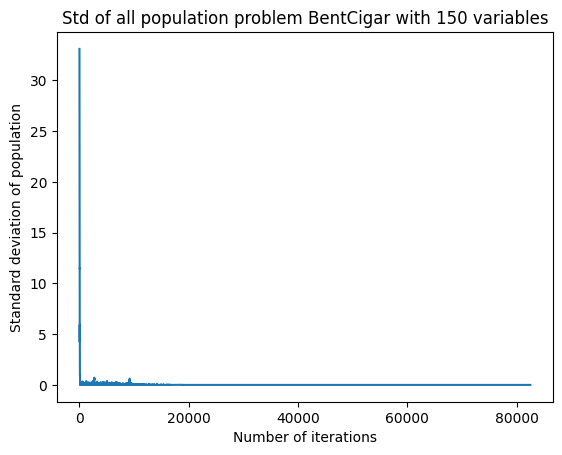

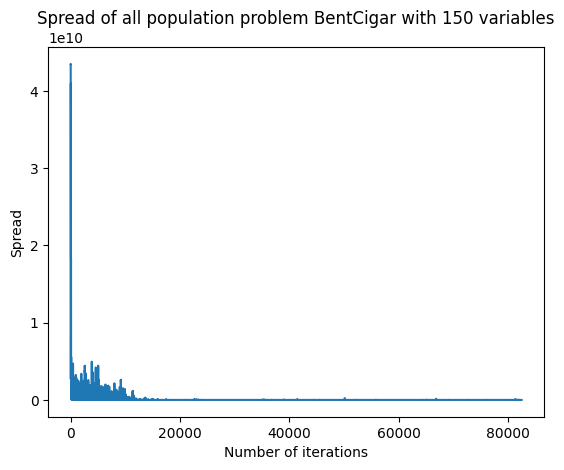

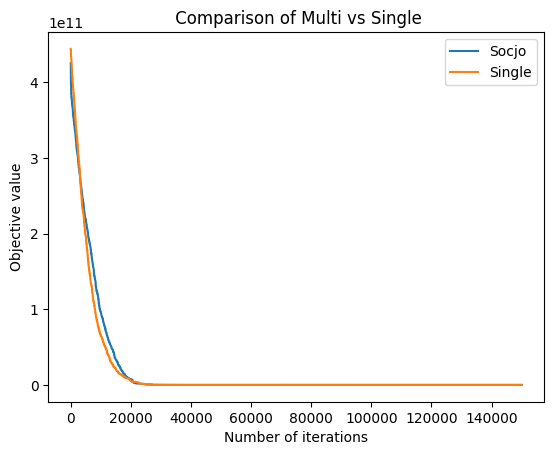

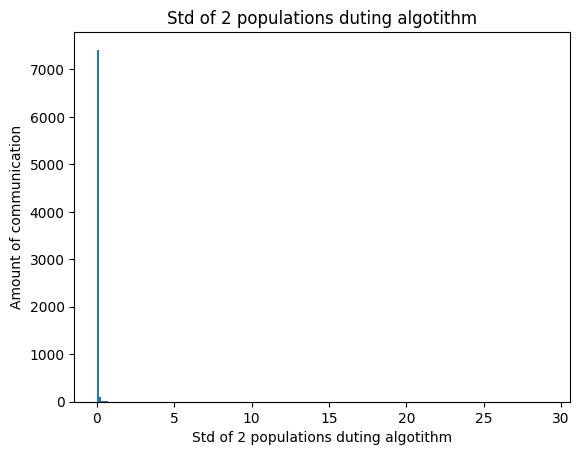

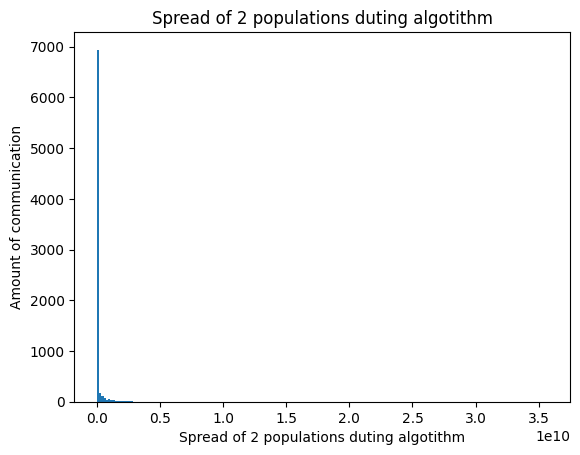

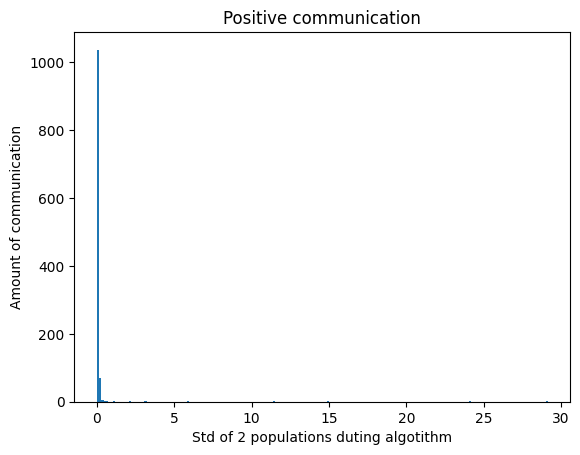

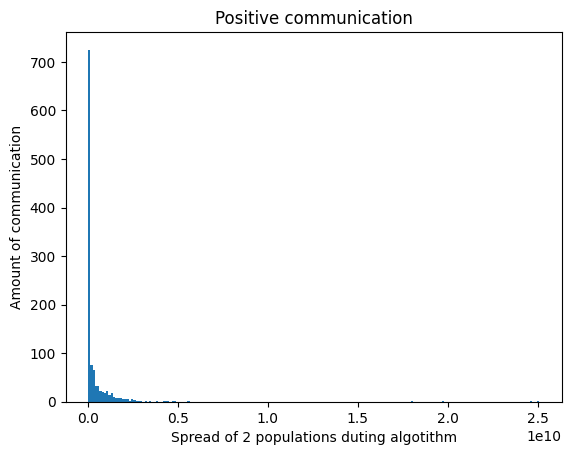

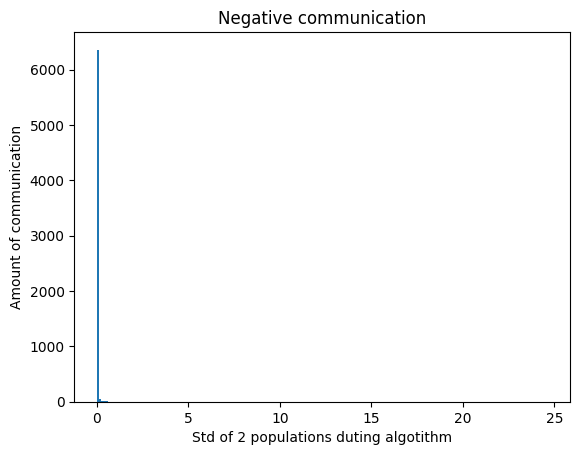

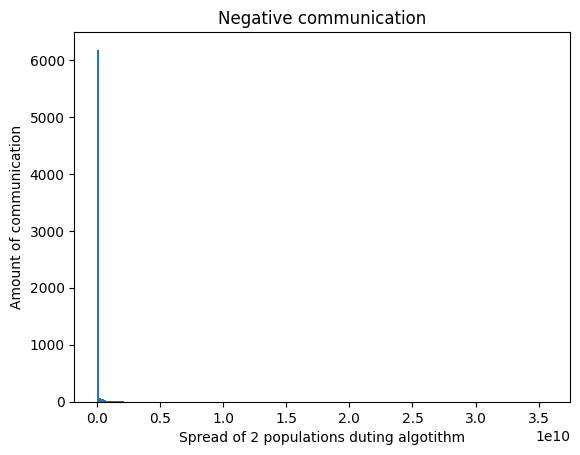

INFO:root:plotting finished in 0.058547842502594
INFO:root:Run 0 out of 2
INFO:root:Socjo started
INFO:root:Socjo finished in 4.411734044551849
INFO:root:comparison finished in 3.9466771880785623
INFO:root:best socjo 71662.27664349397 best single 80951.83722516762


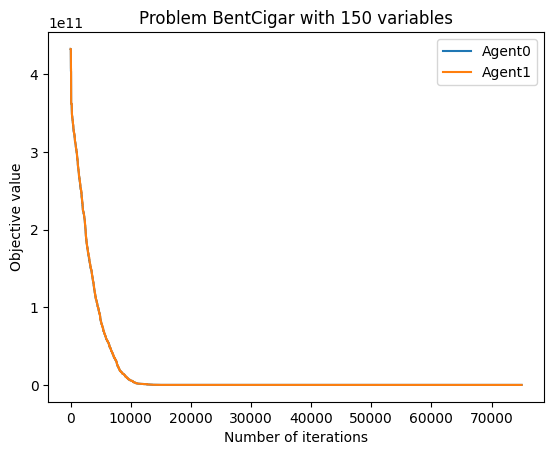

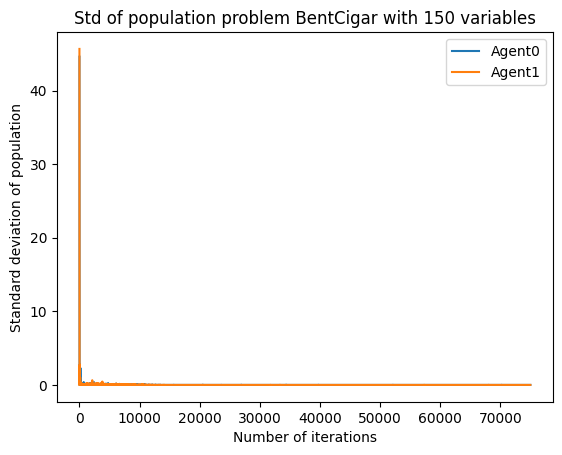

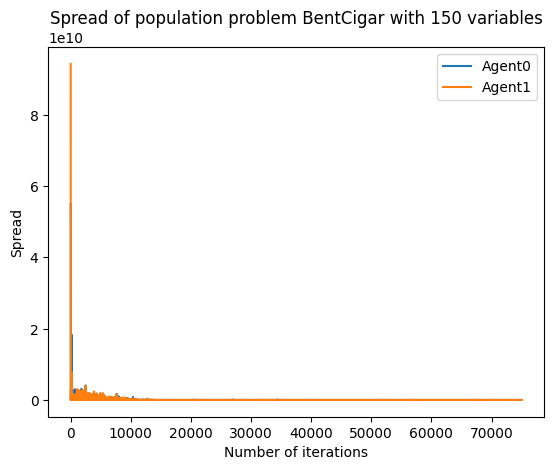

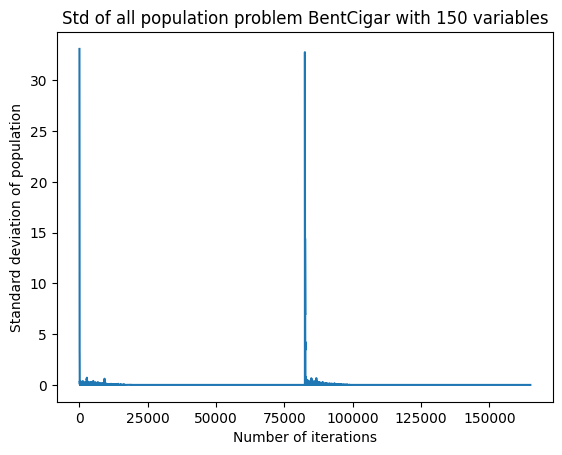

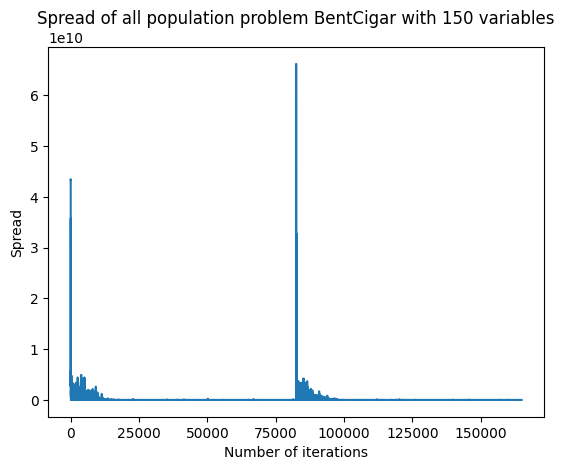

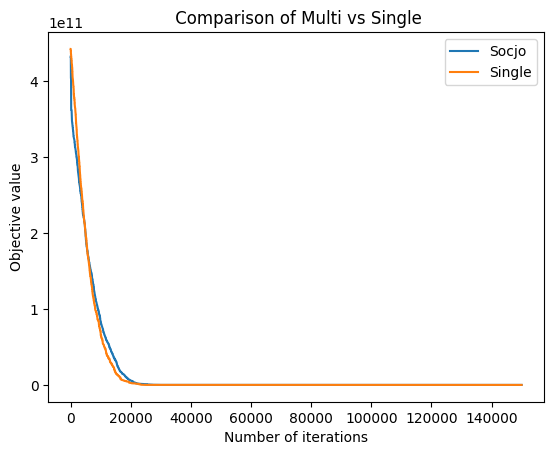

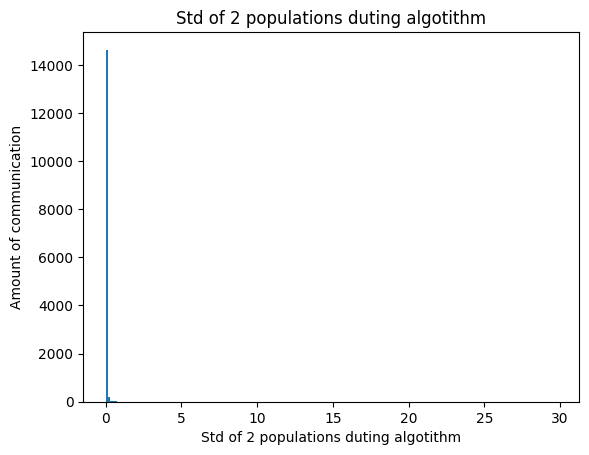

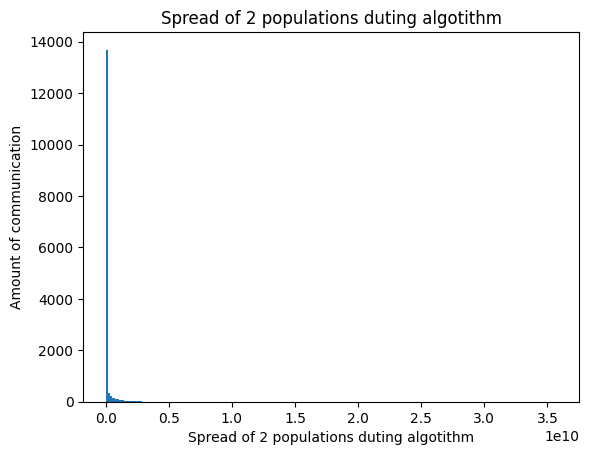

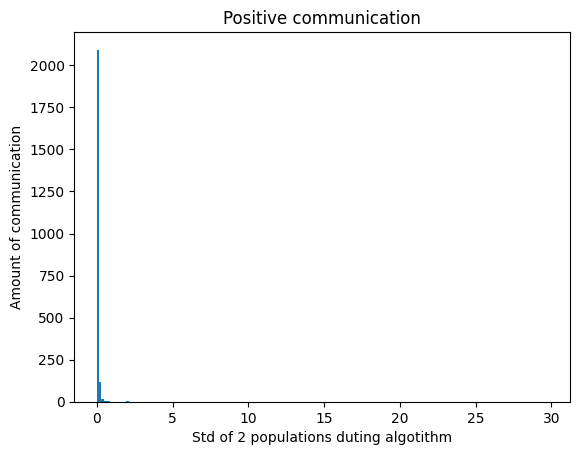

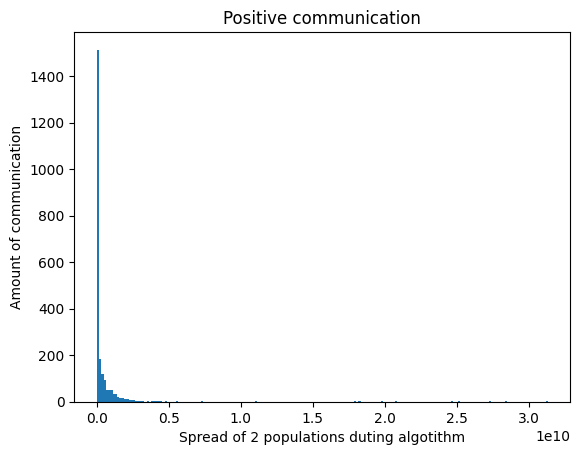

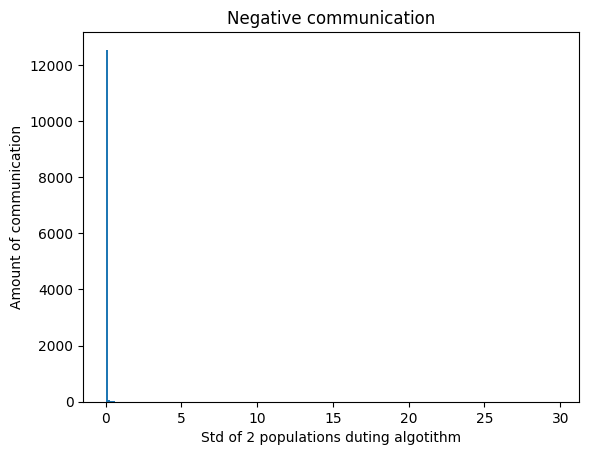

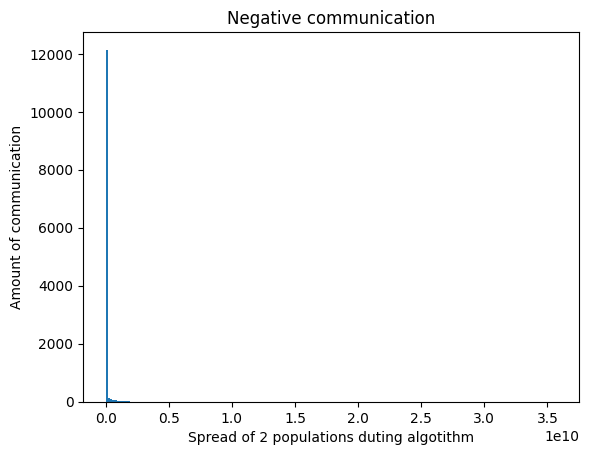

INFO:root:plotting finished in 0.0554803212483724
INFO:root:Run 1 out of 2


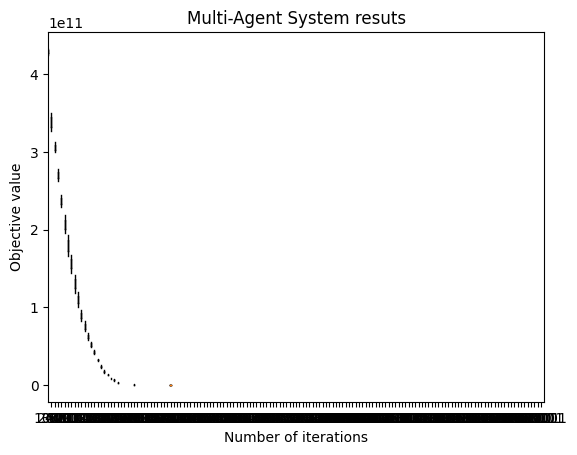

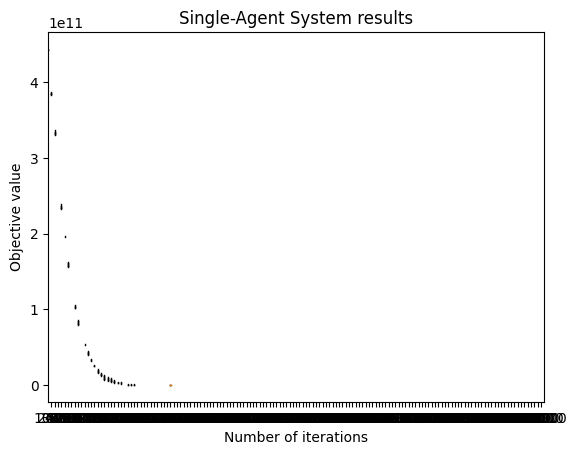

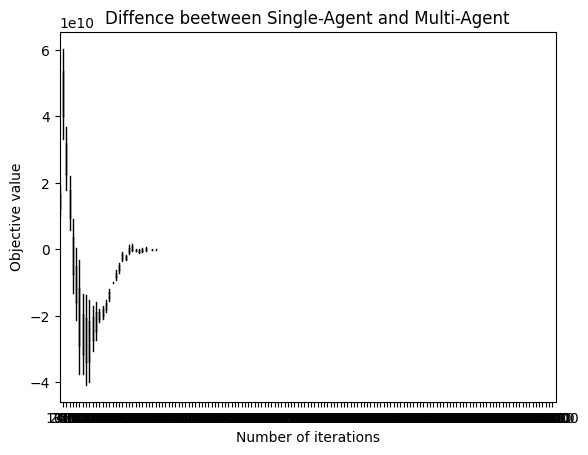

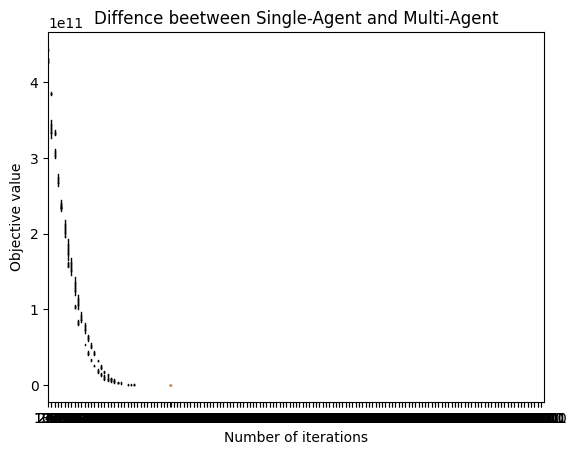

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 2, 'problem': 'Discus', 'problem_size': 150, 'communication_type': 'temp2', 'communication_operator': 'swap', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 150005it [00:36, 4151.70it/s]                            
INFO:root:Socjo finished in 4.420560844739279
Progress: 150005it [00:16, 9300.41it/s]                            
INFO:root:comparison finished in 3.969896841049194
INFO:root:best socjo 22.54023804958502 best single 2.7670624352657747


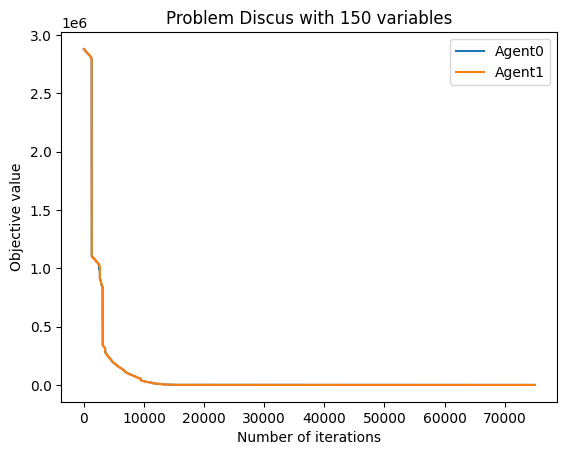

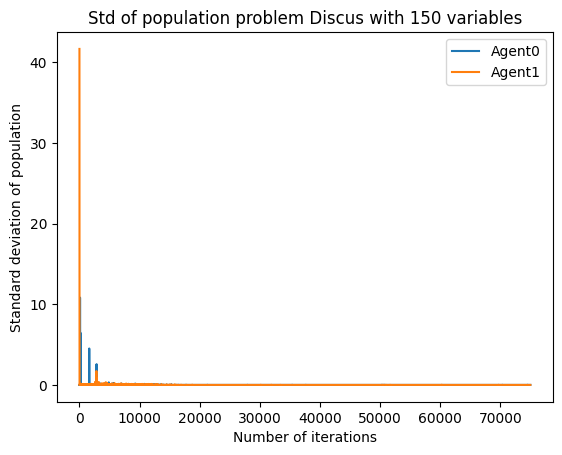

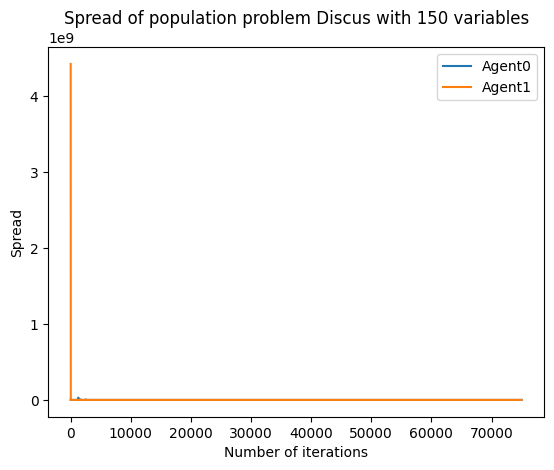

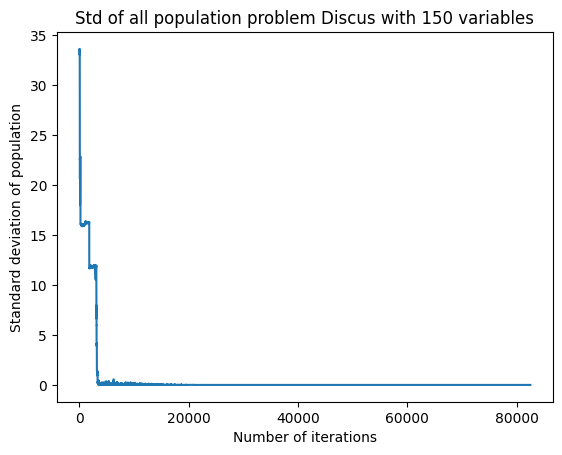

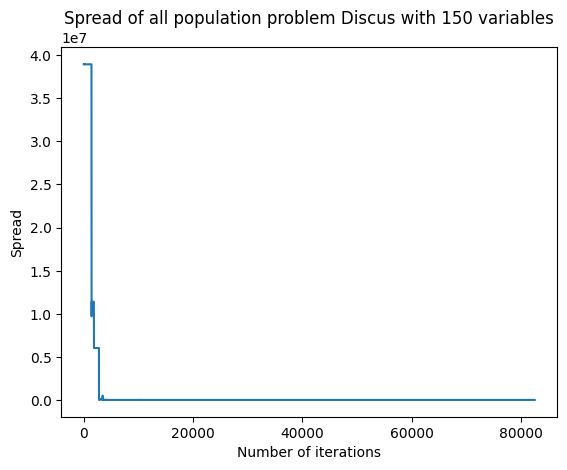

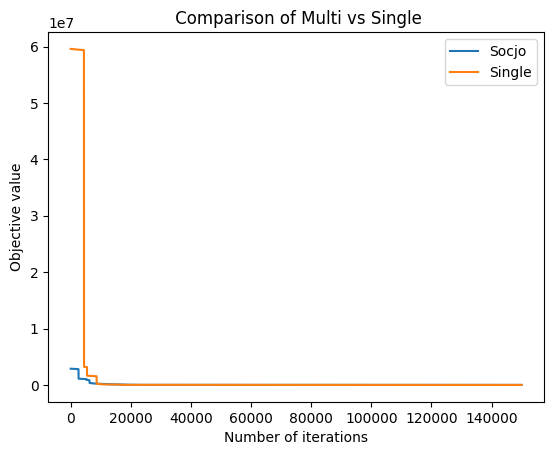

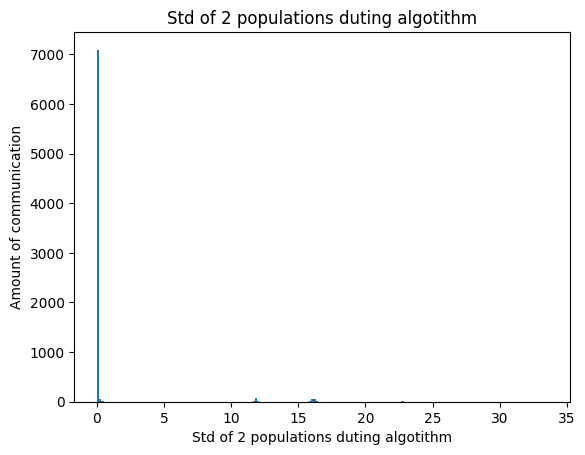

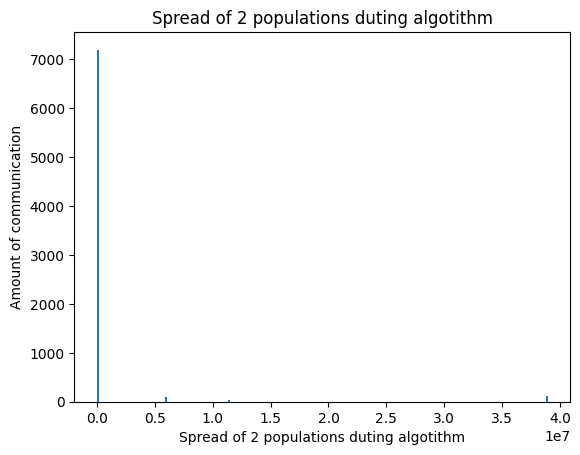

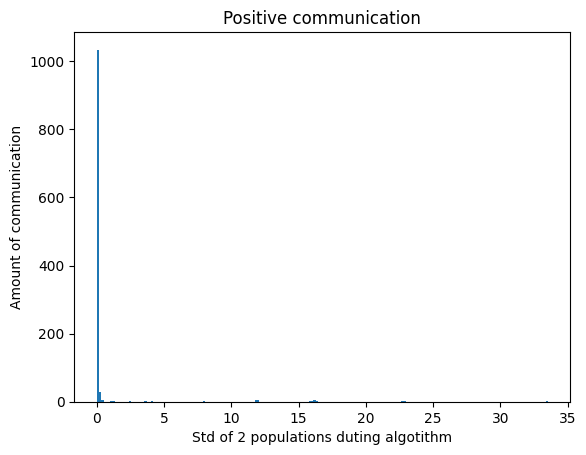

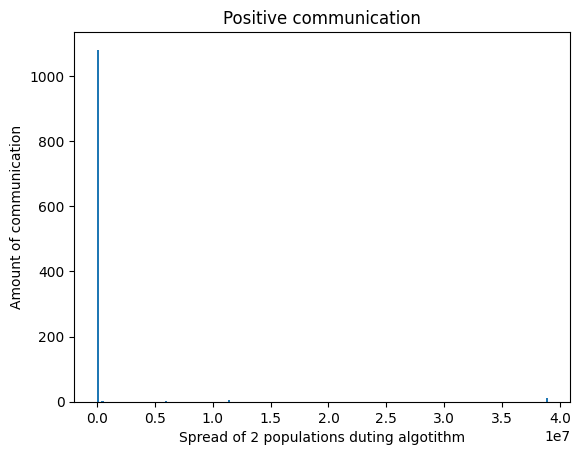

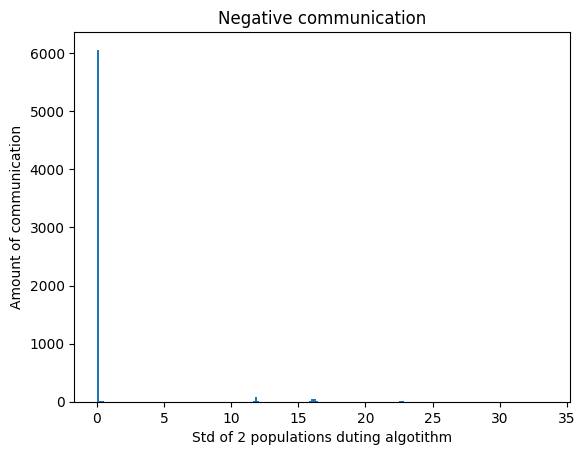

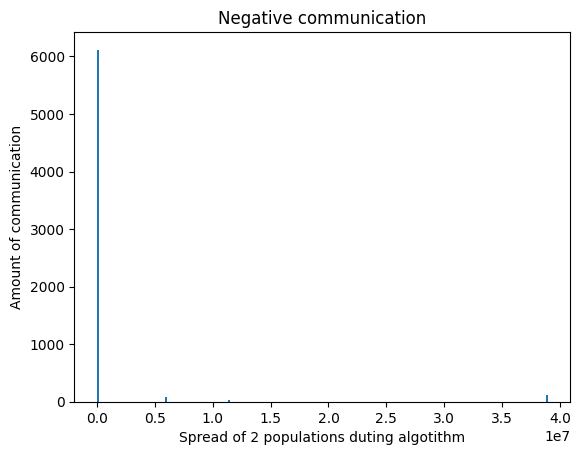

INFO:root:plotting finished in 0.05382971366246541
INFO:root:Run 0 out of 2
INFO:root:Socjo started
INFO:root:Socjo finished in 4.401737554868062
INFO:root:comparison finished in 3.9811807672182717
INFO:root:best socjo 340.0650792351416 best single 591.7693205409827


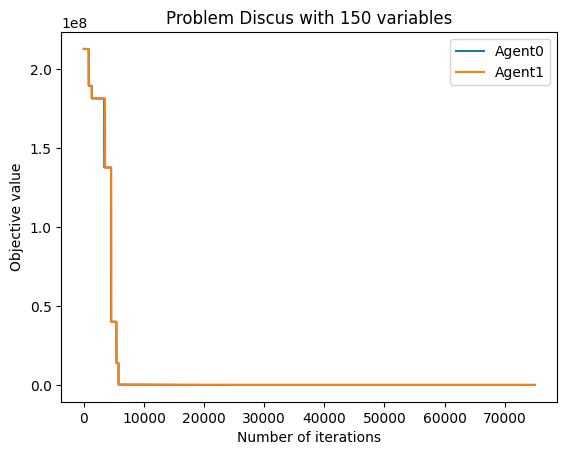

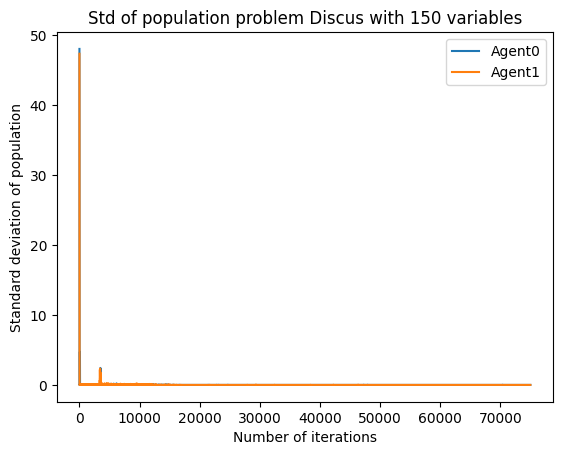

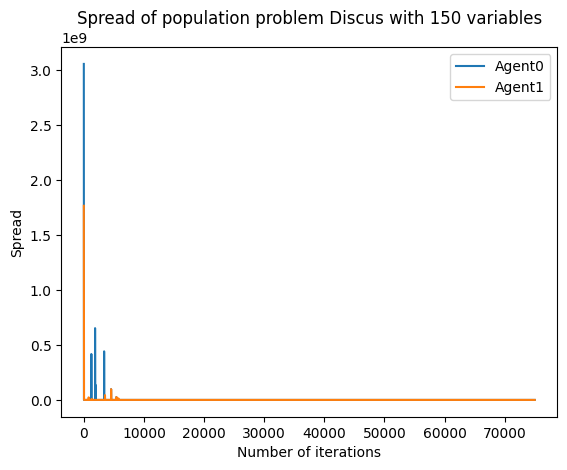

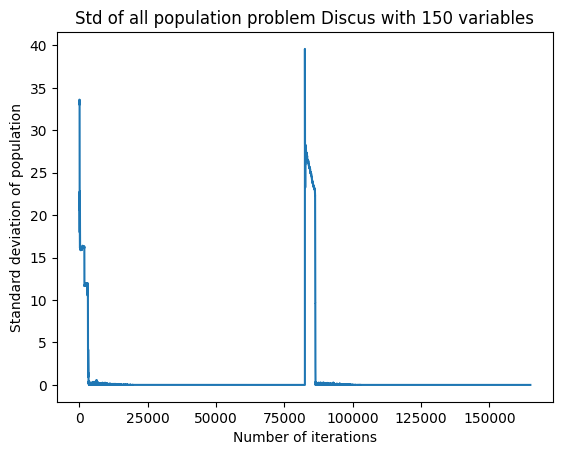

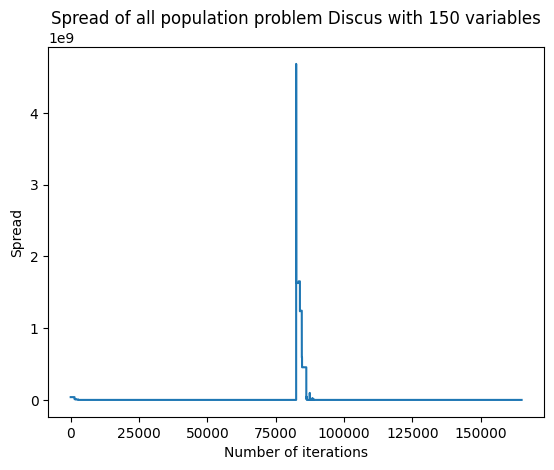

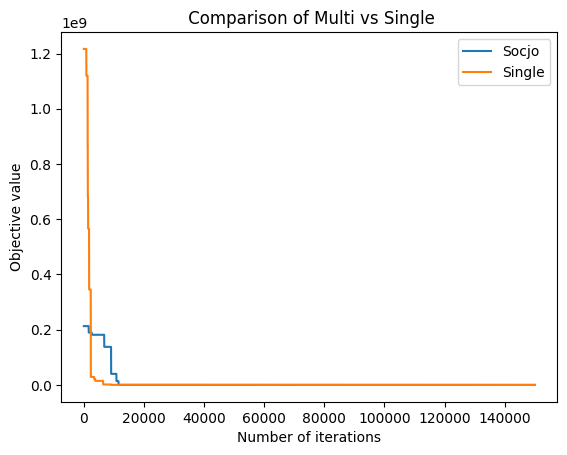

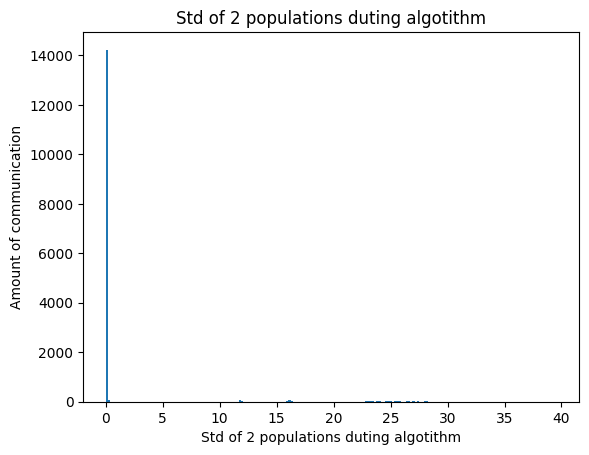

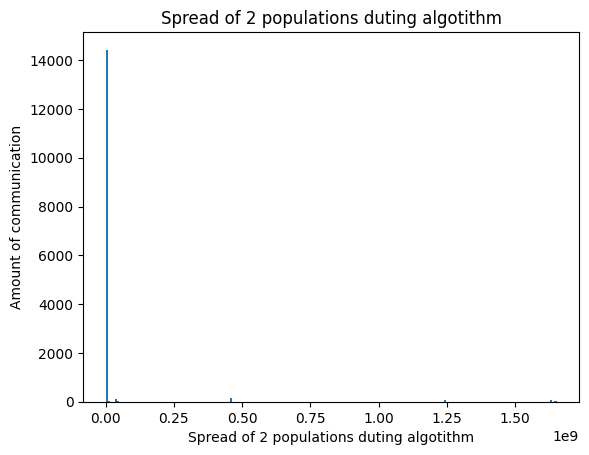

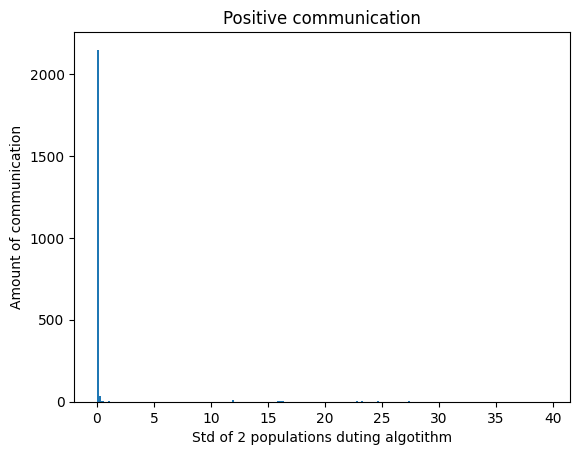

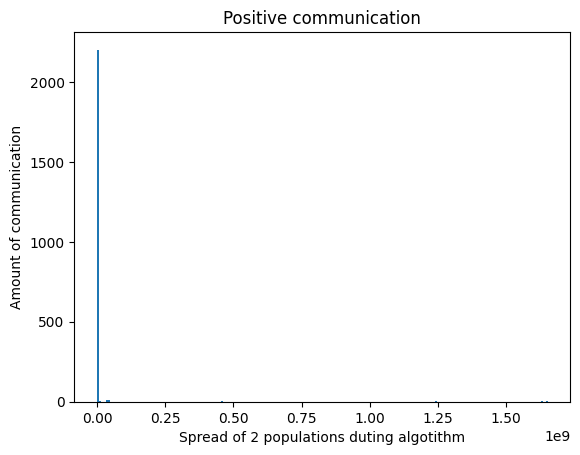

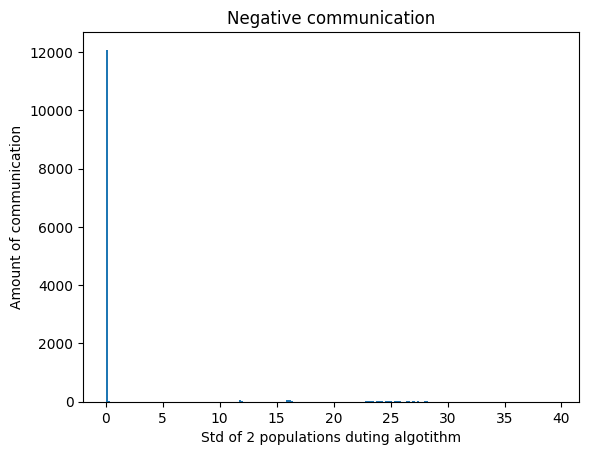

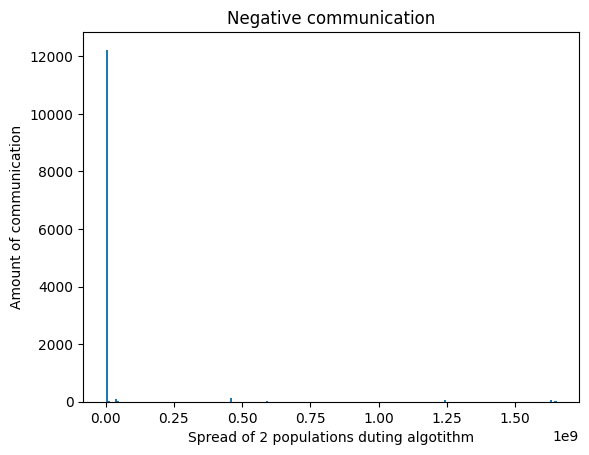

INFO:root:plotting finished in 0.05582118034362793
INFO:root:Run 1 out of 2


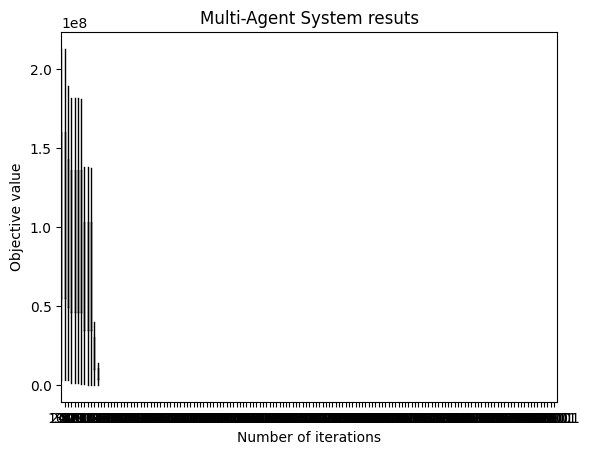

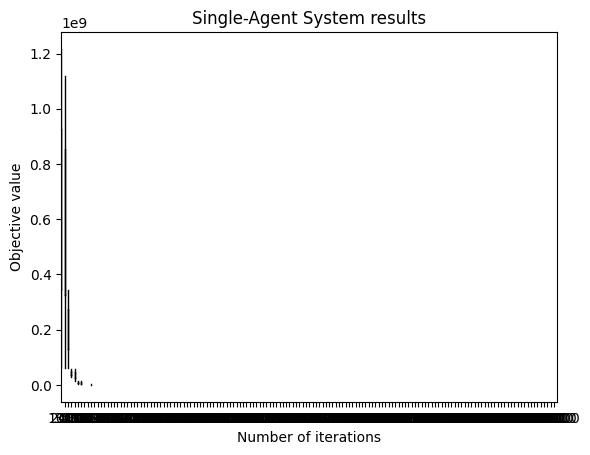

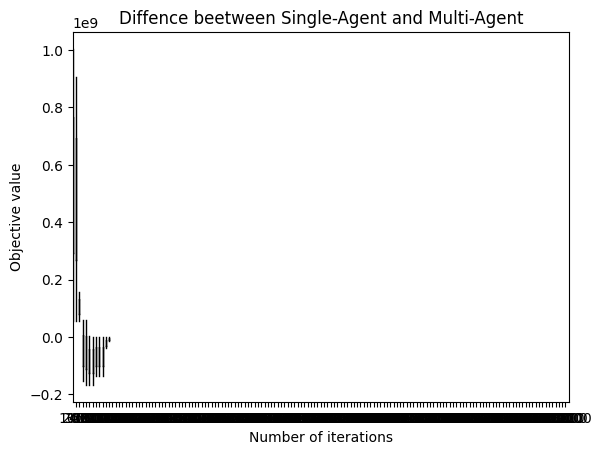

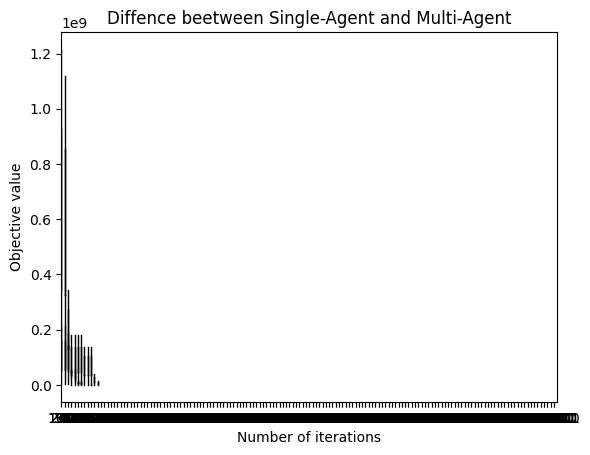

In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner 
from time import time
NUM_OF_COMM = 1
time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_B.json","config_D.json"]):#, "config_A.json"]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    iterations = config.problem.number_of_variables *100 * 10 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 2, cycles=int(iterations/10/config.noAgents) , cycle_iter=10, num_of_comm=NUM_OF_COMM)
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()
    #Statistic_runner_list[idx].save_progres(config = config, num_of_comm  =NUM_OF_COMM )

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 2, 'problem': 'BentCigar', 'problem_size': 150, 'communication_type': 'temp2', 'communication_operator': 'swap', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 1500005it [15:23, 1623.63it/s]                             
INFO:root:Socjo finished in 45.67270785570145
Progress: 1500005it [02:41, 9314.35it/s]                             
INFO:root:comparison finished in 40.59736933708191
INFO:root:best socjo 762.0129206332562 best single 630.2584841576971


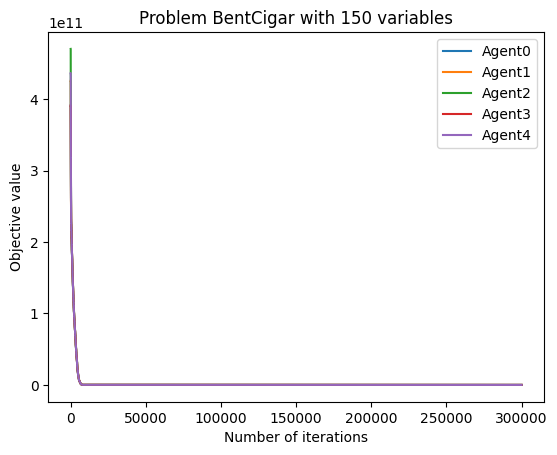

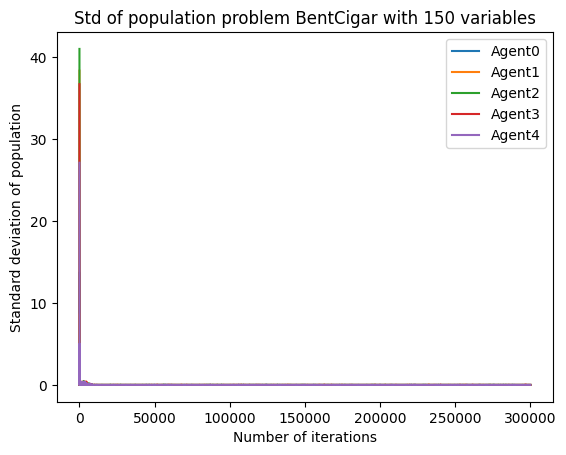

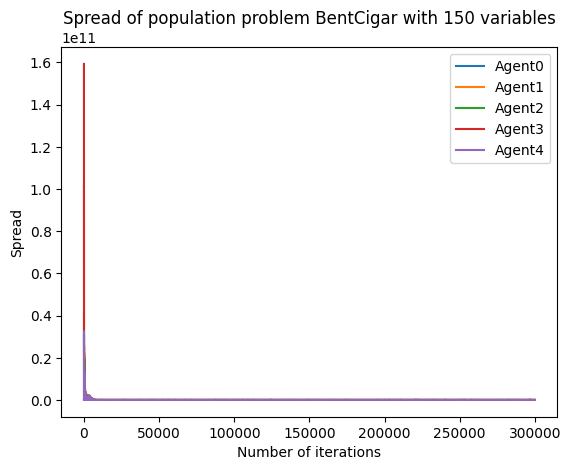

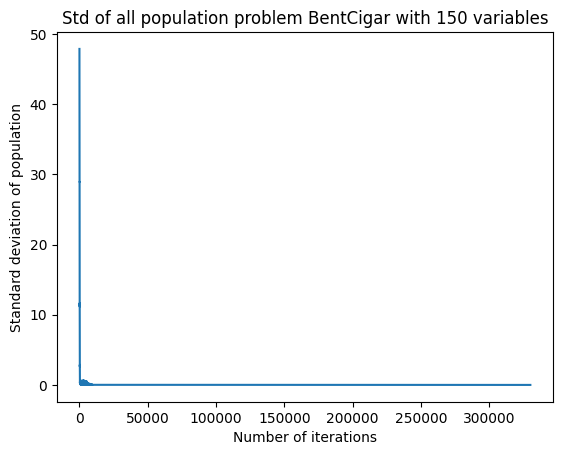

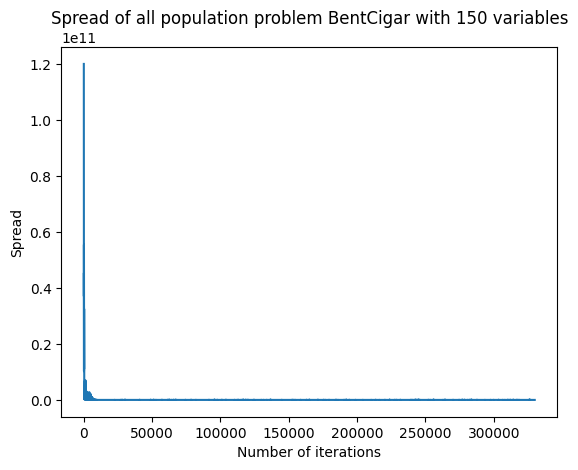

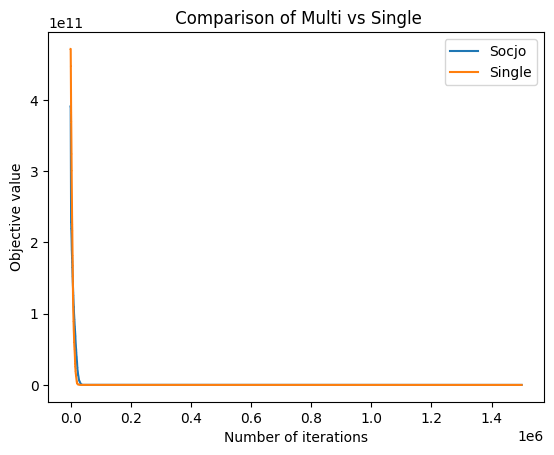

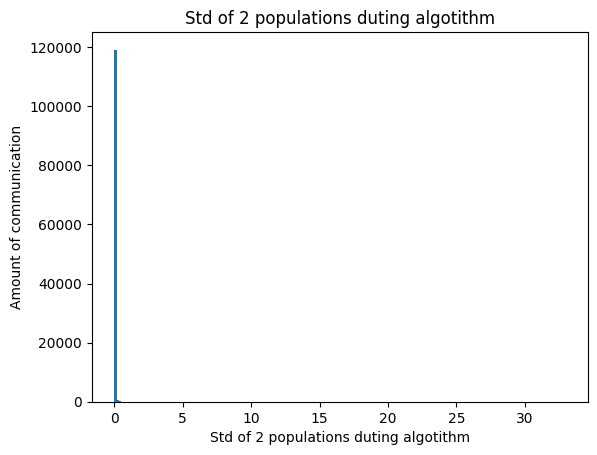

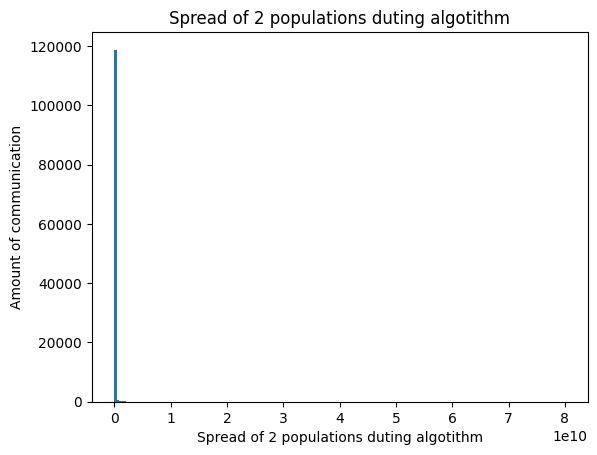

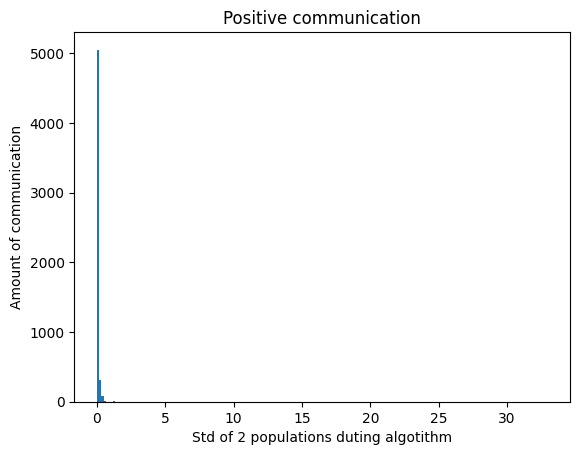

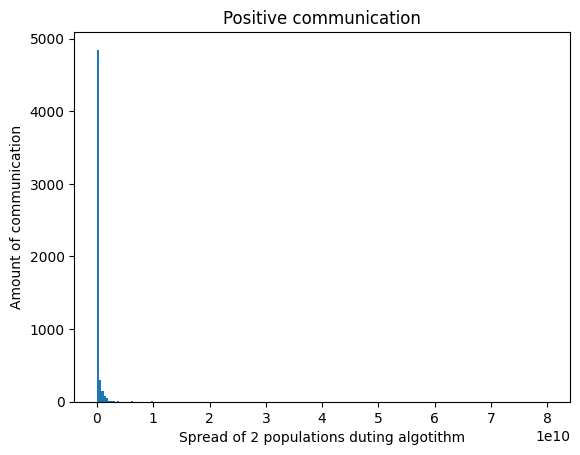

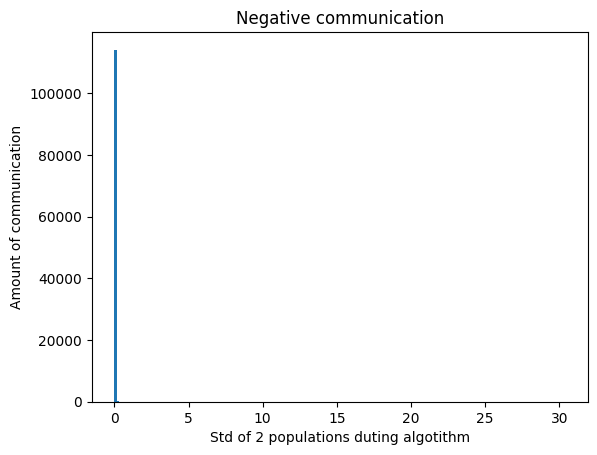

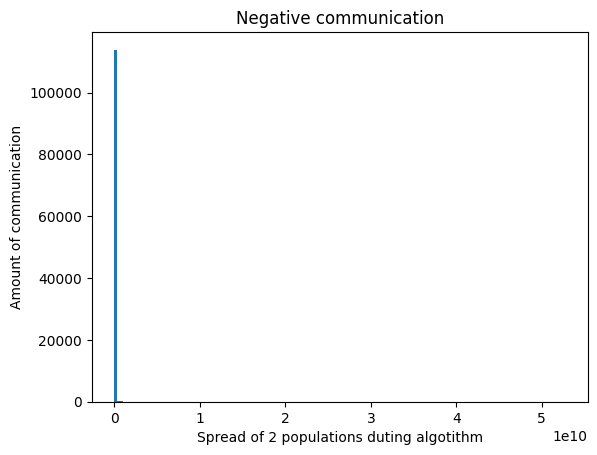

INFO:root:plotting finished in 0.15175061623255412
INFO:root:Run 0 out of 2
INFO:root:Socjo started
INFO:root:Socjo finished in 46.559612743059795
INFO:root:comparison finished in 40.21329599618912
INFO:root:best socjo 793.5079954244542 best single 660.7937205295445


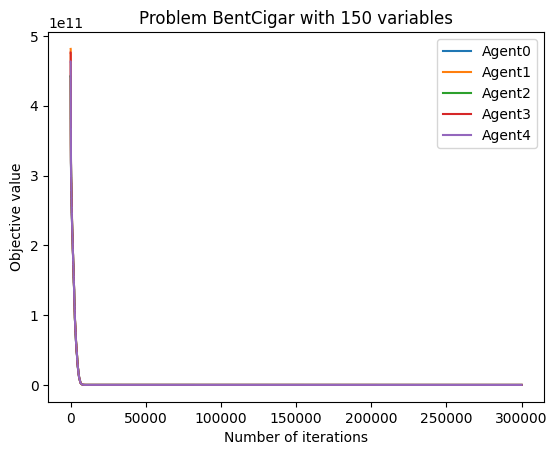

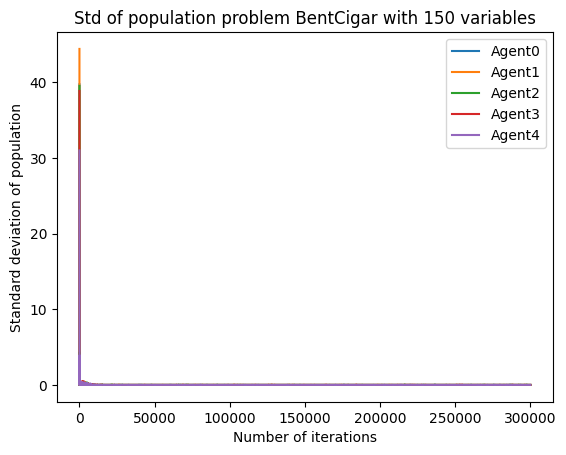

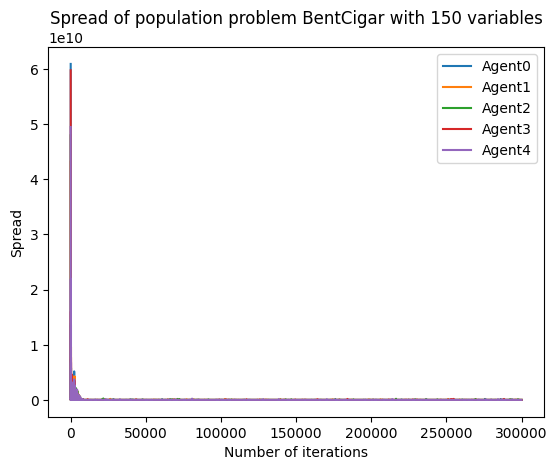

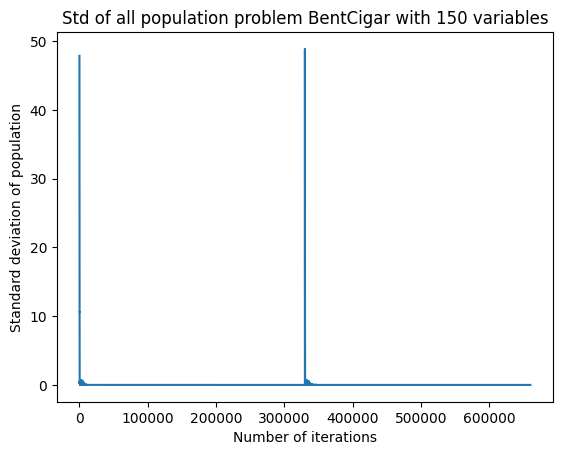

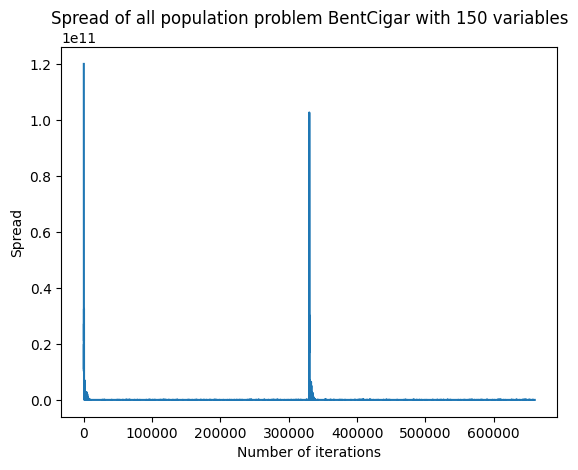

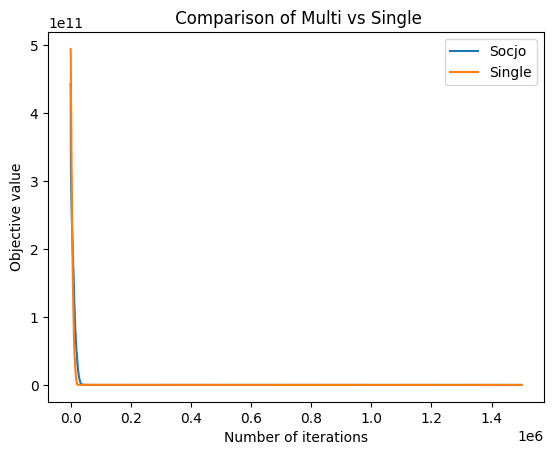

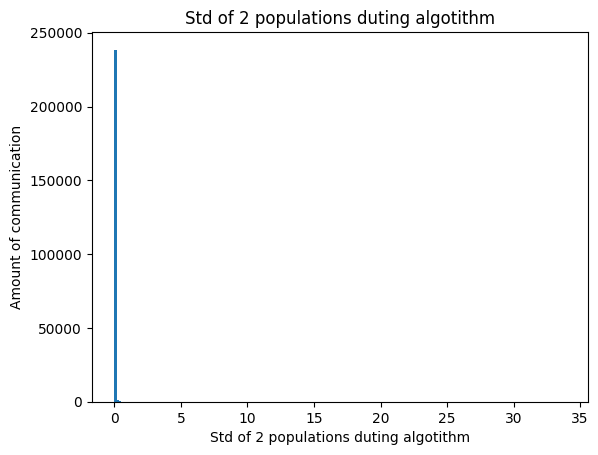

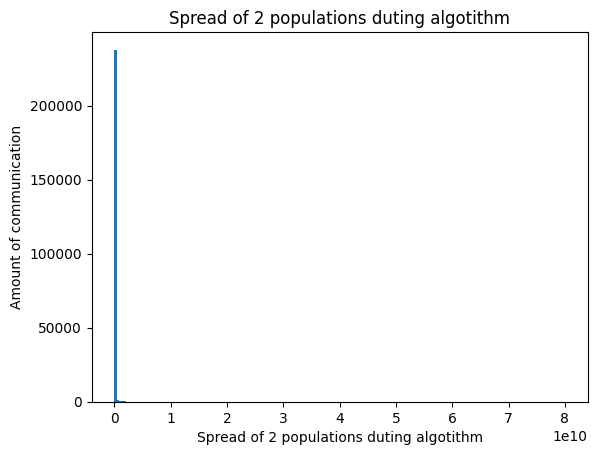

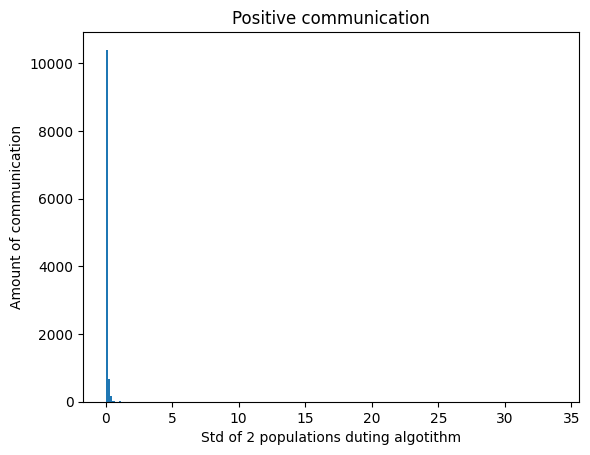

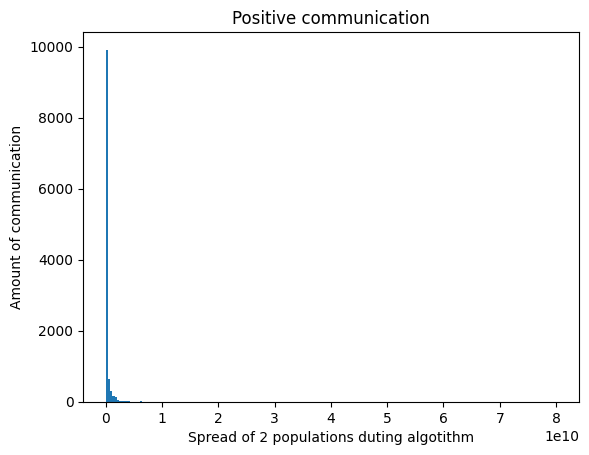

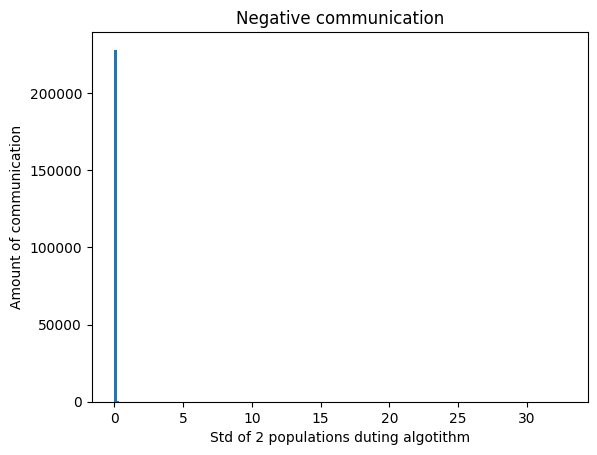

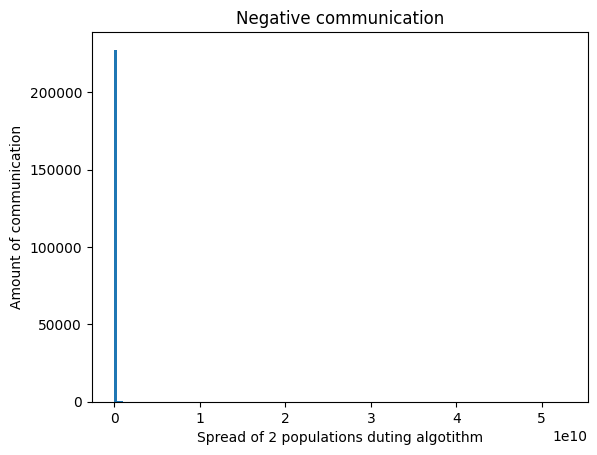

INFO:root:plotting finished in 0.17693429787953693
INFO:root:Run 1 out of 2


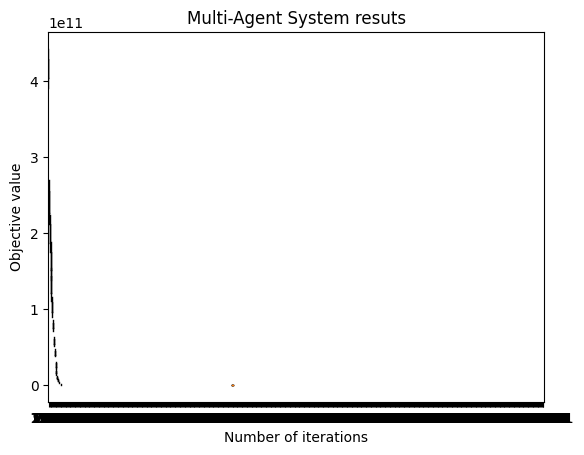

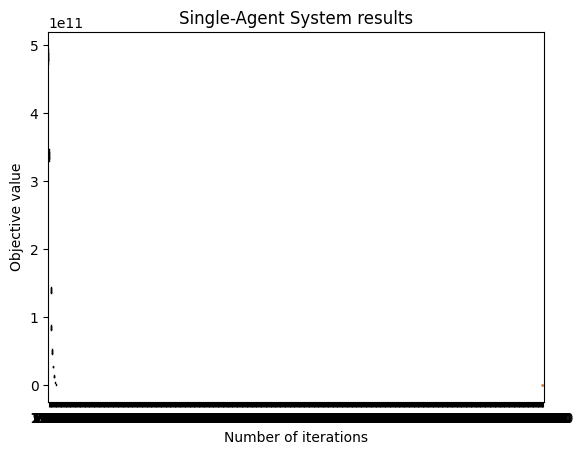

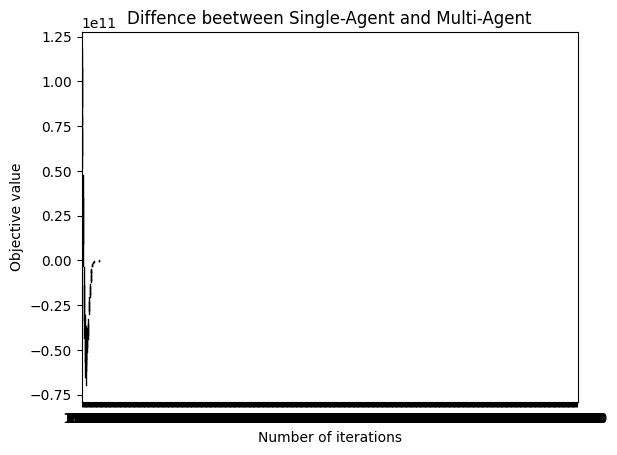

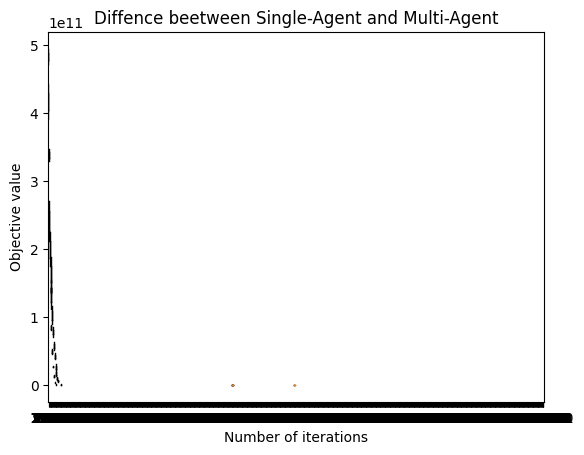

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 2, 'problem': 'Discus', 'problem_size': 150, 'communication_type': 'temp2', 'communication_operator': 'swap', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 1500005it [15:27, 1618.08it/s]                             
INFO:root:Socjo finished in 45.762228127320604
Progress: 1500005it [02:42, 9213.53it/s]                             
INFO:root:comparison finished in 39.08244775136312
INFO:root:best socjo 1.7703770184627177 best single 0.14878234107567798


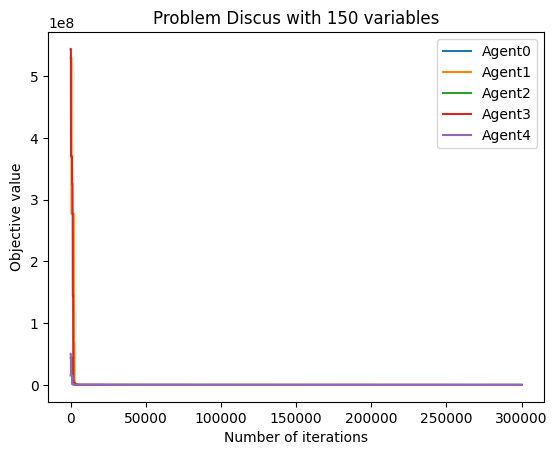

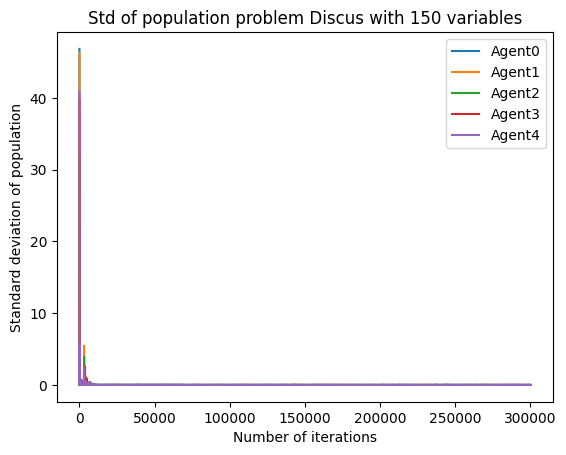

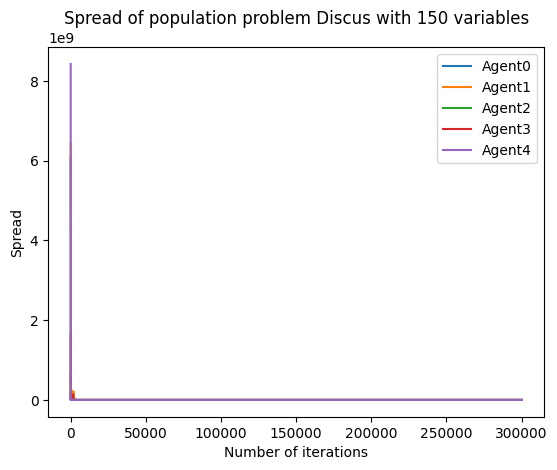

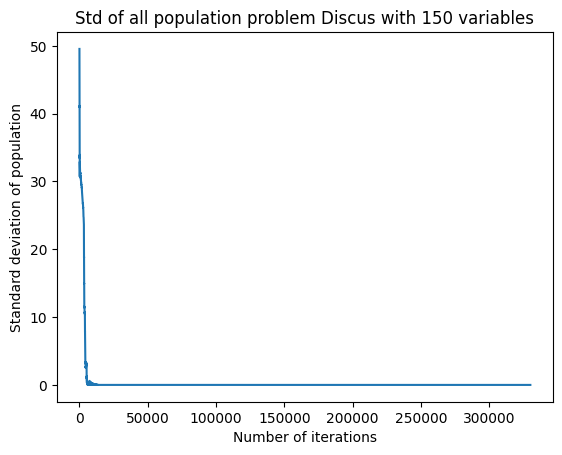

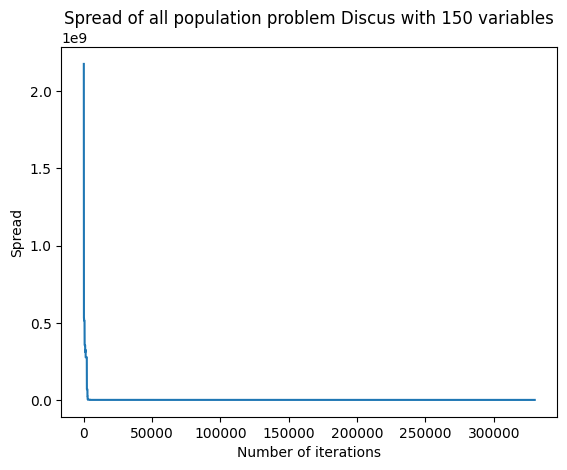

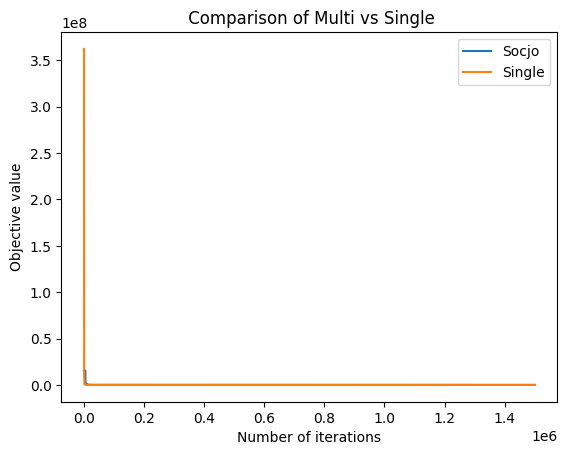

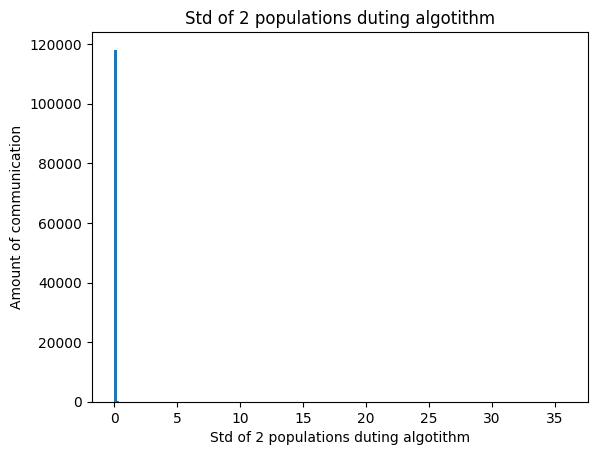

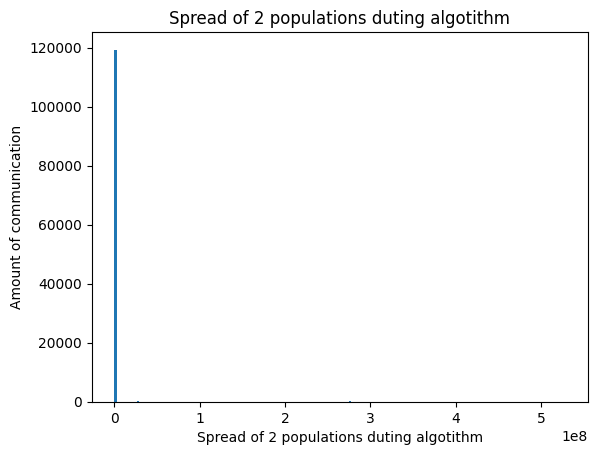

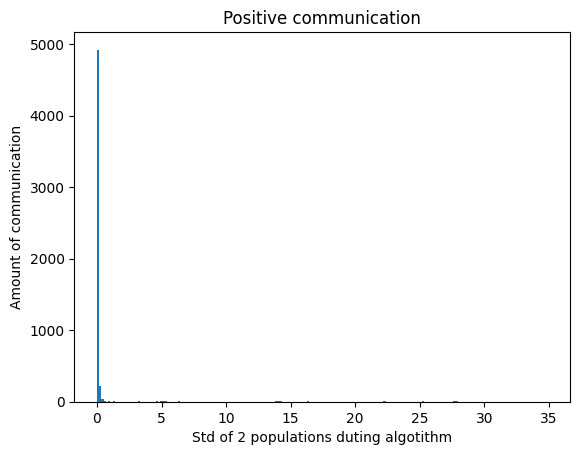

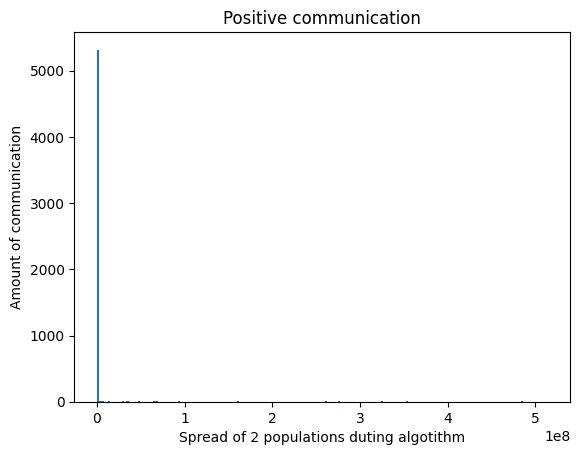

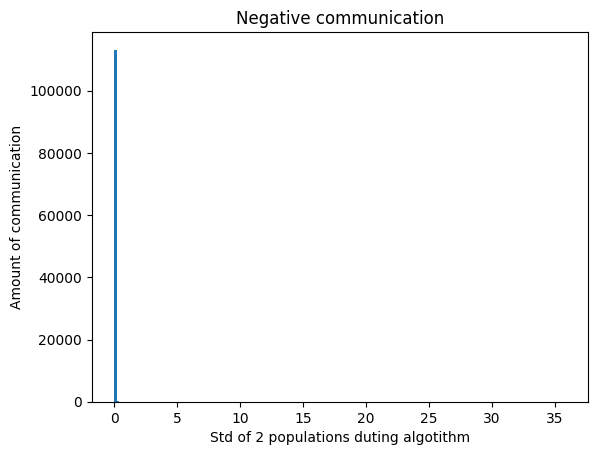

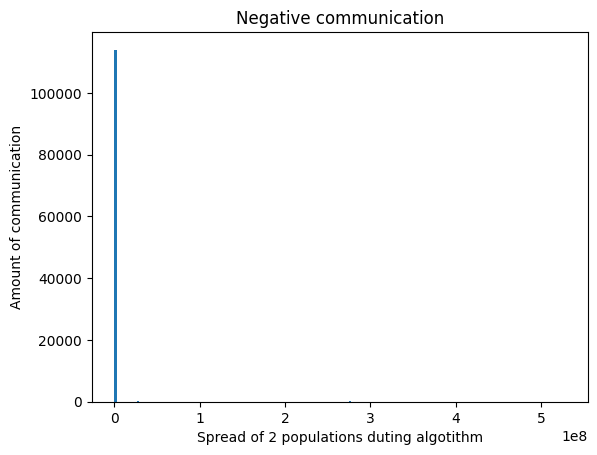

INFO:root:plotting finished in 0.2306934396425883
INFO:root:Run 0 out of 2
INFO:root:Socjo started
INFO:root:Socjo finished in 45.55747976700465
INFO:root:comparison finished in 38.968582506974535
INFO:root:best socjo 0.5677480063001996 best single 17.858680689123204


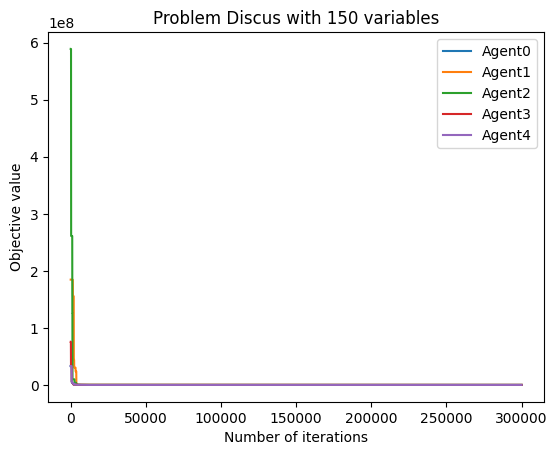

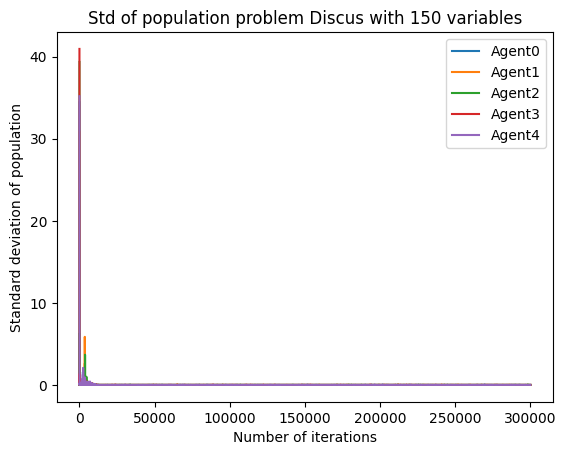

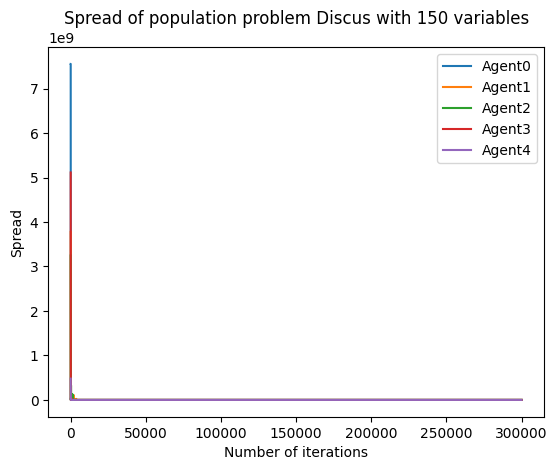

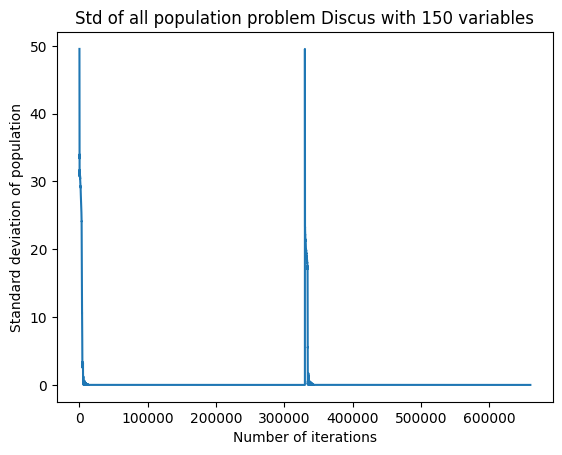

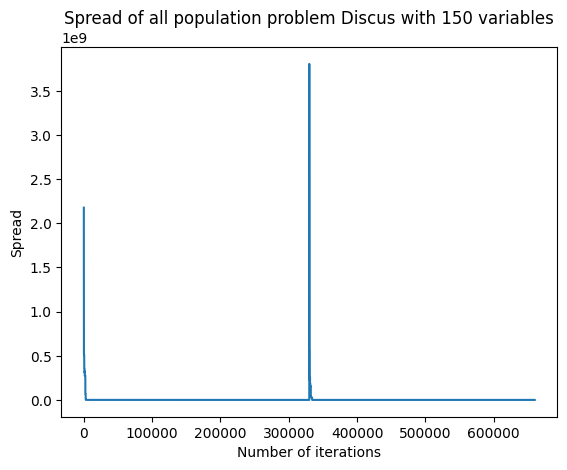

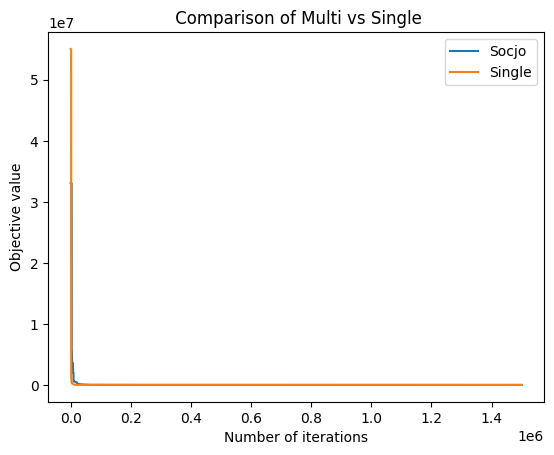

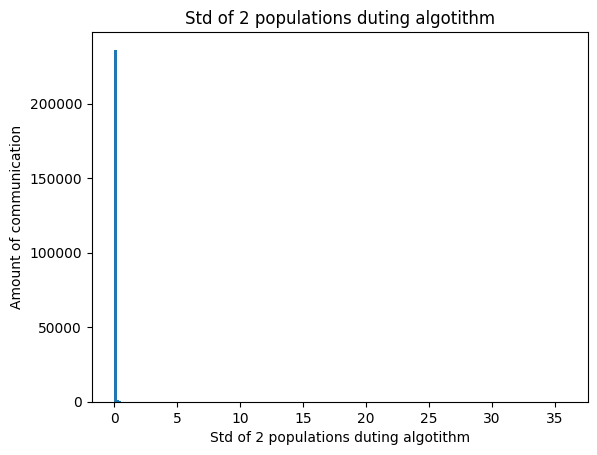

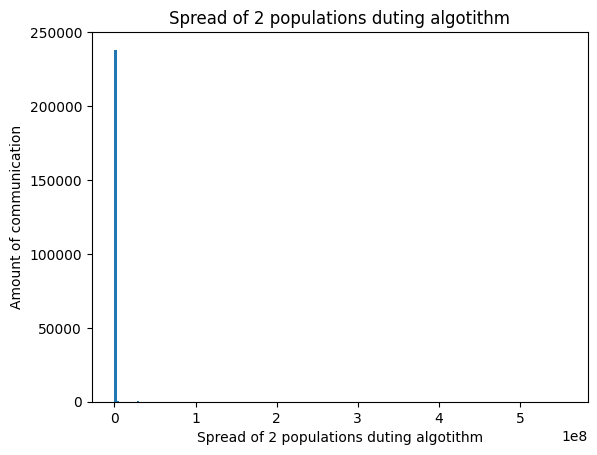

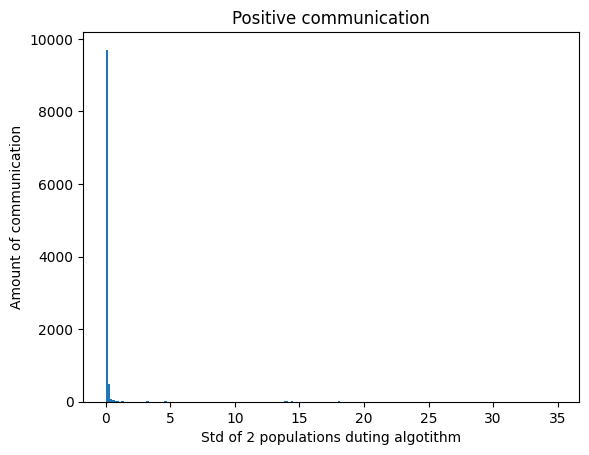

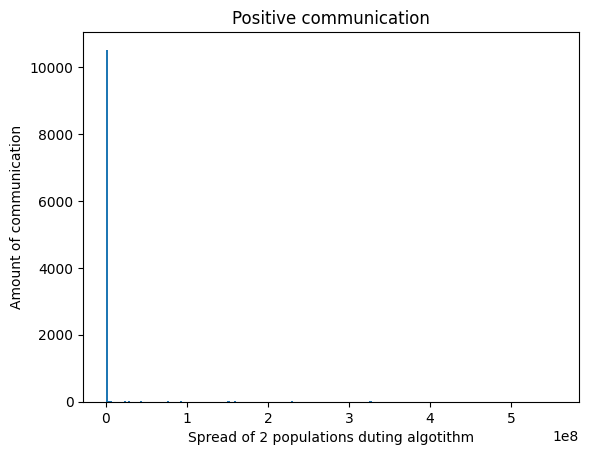

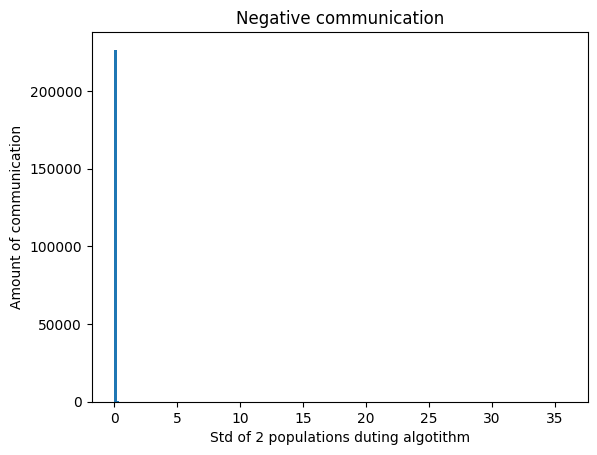

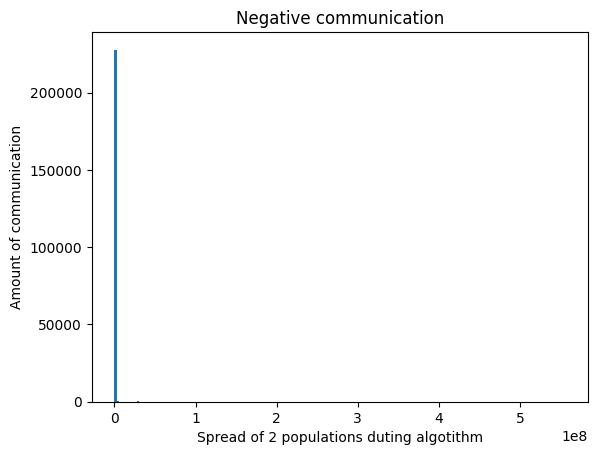

INFO:root:plotting finished in 0.1933363954226176
INFO:root:Run 1 out of 2


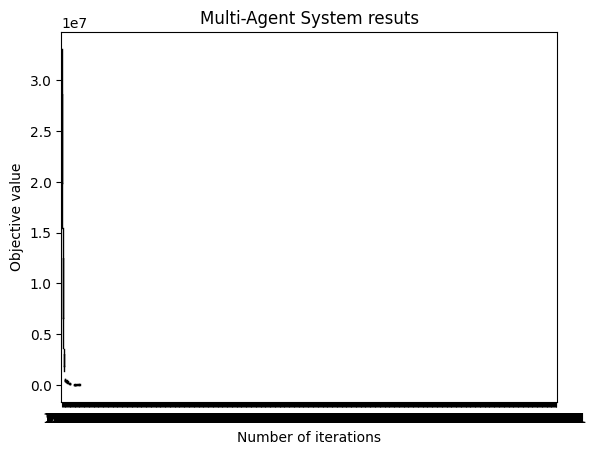

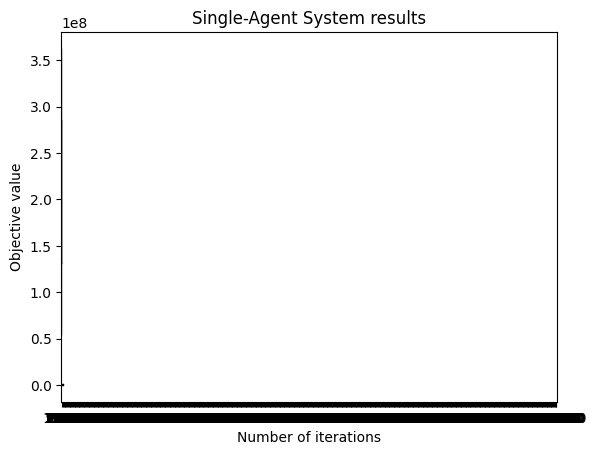

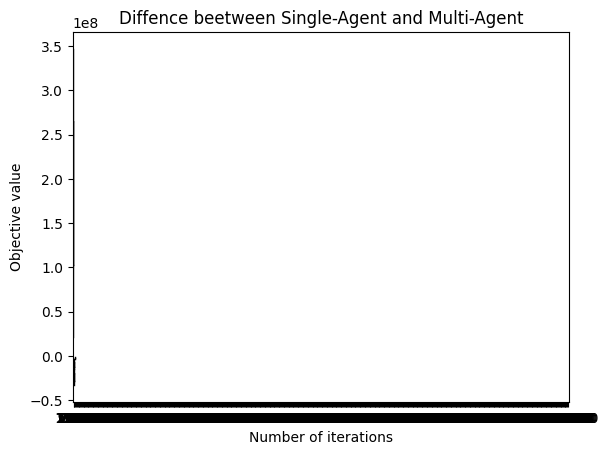

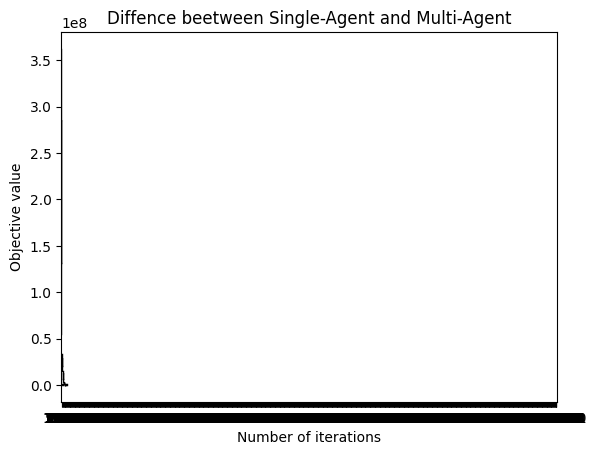

In [2]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner 
from time import time
NUM_OF_COMM = 1
time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_B.json","config_D.json"]):#, "config_A.json"]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    config.noAgents = 5
    iterations = config.problem.number_of_variables *100 * 100 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 2, cycles=int(iterations/10/config.noAgents) , cycle_iter=10, num_of_comm=NUM_OF_COMM)
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()
    #Statistic_runner_list[idx].save_progres(config = config, num_of_comm  =NUM_OF_COMM )

In [3]:
for el in Statistic_runner_list:   
    for i in range (0, len(el.Executor.comunication_history)//1000):

        lista1 = list(filter(lambda hist: hist.result == True, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        lista2 = list(filter(lambda hist: hist.result == False, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        print(f"{i*1000} - {(i+1)*1000} nr komunikacji pozytywna {lista1.__len__()} negatyna {lista2.__len__()}")


0 - 1000 nr komunikacji pozytywna 579 negatyna 421
1000 - 2000 nr komunikacji pozytywna 565 negatyna 435
2000 - 3000 nr komunikacji pozytywna 538 negatyna 462
3000 - 4000 nr komunikacji pozytywna 424 negatyna 576
4000 - 5000 nr komunikacji pozytywna 322 negatyna 678
5000 - 6000 nr komunikacji pozytywna 262 negatyna 738
6000 - 7000 nr komunikacji pozytywna 198 negatyna 802
7000 - 8000 nr komunikacji pozytywna 178 negatyna 822
8000 - 9000 nr komunikacji pozytywna 125 negatyna 875
9000 - 10000 nr komunikacji pozytywna 118 negatyna 882
10000 - 11000 nr komunikacji pozytywna 107 negatyna 893
11000 - 12000 nr komunikacji pozytywna 132 negatyna 868
12000 - 13000 nr komunikacji pozytywna 95 negatyna 905
13000 - 14000 nr komunikacji pozytywna 92 negatyna 908
14000 - 15000 nr komunikacji pozytywna 52 negatyna 948
15000 - 16000 nr komunikacji pozytywna 72 negatyna 928
16000 - 17000 nr komunikacji pozytywna 58 negatyna 942
17000 - 18000 nr komunikacji pozytywna 57 negatyna 943
18000 - 19000 nr kom